# Traffic Accident Prediction Model

## Objective

The objective of the Traffic Accident Prediction Model is to develop a machine learning system that can accurately predict the likelihood of traffic accidents based on various contributing factors. The model aims to:

1. **Enhance Road Safety**: By predicting potential accident scenarios, the model can help in implementing proactive measures to improve road safety, thereby reducing the number of accidents and injuries.

2. **Analyze Contributing Factors**: The model will analyze various factors such as weather conditions, traffic volume, time of day, and location to understand their influence on accident occurrences.

3. **Data-Driven Decision Making**: Provide insights and analytics that can assist city planners, traffic management authorities, and law enforcement agencies in making informed decisions related to road safety measures, infrastructure improvements, and policy formulation.

4. **Real-Time Alerts**: Facilitate the development of systems that can provide real-time alerts to drivers and traffic management systems when a high likelihood of an accident is detected based on current conditions.

5. **Support Research**: Contribute to the body of research in traffic safety by providing a comprehensive framework for understanding and mitigating traffic accidents through predictive analytics.

6. **Resource Allocation**: Aid in optimizing resource allocation for emergency services and traffic control based on predicted accident hotspots and time frames.

By achieving these objectives, the Traffic Accident Prediction Model will play a crucial role in enhancing the overall safety of roadways and reducing the socioeconomic impact of traffic accidents.


## Step 1: **Installation of SHAP**

In [6]:
pip install shap --upgrade

Note: you may need to restart the kernel to use updated packages.


## Step 2: **Create Datasets**
We will begin by generating synthetic datasets for accidents and weather conditions.

In [7]:
import pandas as pd
import numpy as np

# Set random seed for reproducibility
np.random.seed(42)

# Generate synthetic accident data
num_records = 1000  # Total number of records

# Generate dates
dates = pd.date_range(start='2023-01-01', periods=num_records, freq='H')

# Randomly generate other fields
locations = [f'Location_{i}' for i in range(1, 11)]  # 10 different locations
weather_conditions = ['Clear', 'Rain', 'Snow', 'Fog', 'Overcast']

# Create accident dataset
accident_data = {
    'date': dates,
    'location': np.random.choice(locations, num_records),
    'time': dates.time,
    'weather_condition': np.random.choice(weather_conditions, num_records),
    'traffic_volume': np.random.randint(50, 200, num_records),  # Random traffic volume
}

# Create a DataFrame first
accidents_df = pd.DataFrame(accident_data)

# Randomly determine if an accident occurred (1) or not (0)
accidents_df['accident_occurred'] = np.where(
    (accidents_df['traffic_volume'] > 150) & (accidents_df['weather_condition'].isin(['Rain', 'Snow'])), 
    1, 
    np.random.choice([0, 1], num_records, p=[0.8, 0.2])  # 80% chance of no accident, 20% chance of accident
)

# Save the accident dataset to CSV
accidents_df.to_csv('accident_data.csv', index=False)

# Generate synthetic weather data
weather_data = {
    'date': dates,
    'temperature': np.random.randint(-10, 35, num_records),  # Random temperatures between -10 and 35 degrees
    'precipitation': np.random.choice([0, 0.1, 0.2, 0.5, 1.0], num_records)  # Precipitation levels
}

# Create a DataFrame for weather data
weather_df = pd.DataFrame(weather_data)

# Save the weather dataset to CSV
weather_df.to_csv('weather_data.csv', index=False)

# Print the first few rows of each dataset
print("Accident Data:")
print(accidents_df.head())
print("\nWeather Data:")
print(weather_df.head())

Accident Data:
                 date    location      time weather_condition  traffic_volume  \
0 2023-01-01 00:00:00  Location_7  00:00:00             Clear             199   
1 2023-01-01 01:00:00  Location_4  01:00:00               Fog              86   
2 2023-01-01 02:00:00  Location_8  02:00:00              Snow             192   
3 2023-01-01 03:00:00  Location_5  03:00:00               Fog              60   
4 2023-01-01 04:00:00  Location_7  04:00:00               Fog             187   

   accident_occurred  
0                  0  
1                  0  
2                  1  
3                  0  
4                  0  

Weather Data:
                 date  temperature  precipitation
0 2023-01-01 00:00:00           -1            0.2
1 2023-01-01 01:00:00            8            0.2
2 2023-01-01 02:00:00           14            0.0
3 2023-01-01 03:00:00           -7            1.0
4 2023-01-01 04:00:00           18            0.2


## Step 3:**Data Preparation and Preprocessing**
On the third step, we will load the datasets, merge them, and perform necessary preprocessing steps.

In [8]:
# Load datasets
accidents_df = pd.read_csv('accident_data.csv')
weather_df = pd.read_csv('weather_data.csv')

# Merge datasets on date
data = pd.merge(accidents_df, weather_df, on='date')

# Data Preprocessing
data.dropna(inplace=True)  # Remove rows with missing values

# Convert categorical variables into dummy/indicator variables
data = pd.get_dummies(data, drop_first=True)

# Feature selection
features = data.drop('accident_occurred', axis=1)  # Replace with your target variable
target = data['accident_occurred']  # Binary target: 1 if accident occurred, 0 otherwise

# Split the dataset
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Display shapes of train and test datasets
print(f'Training set shape: {X_train.shape}, {y_train.shape}')
print(f'Testing set shape: {X_test.shape}, {y_test.shape}')

Training set shape: (800, 1038), (800,)
Testing set shape: (200, 1038), (200,)


## Step 4: **Model Training**
On step fourth, we will train a Decision Tree classifier on the prepared dataset.

In [9]:
from sklearn.tree import DecisionTreeClassifier

# Initialize and train the model
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
from sklearn.metrics import accuracy_score, classification_report

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print(classification_report(y_test, y_pred))

Accuracy: 0.73
              precision    recall  f1-score   support

           0       0.78      0.86      0.82       138
           1       0.59      0.47      0.52        62

    accuracy                           0.73       200
   macro avg       0.69      0.66      0.67       200
weighted avg       0.72      0.73      0.73       200



## Step 5: **Model Evaluation and SHAP Analysis**
On step fifth, we will use SHAP to explain the model's predictions and visualize the results.

Shape of SHAP values for class 0 (no accident): (1038, 2)
Shape of SHAP values for class 1 (accident): (1038, 2)


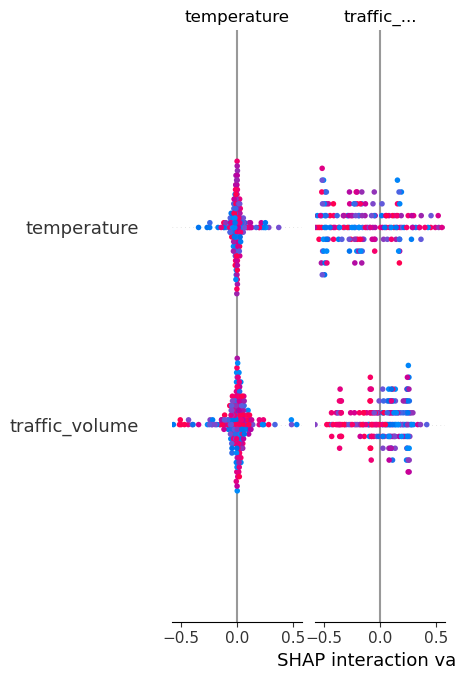

In [11]:
import shap

# Initialize the SHAP explainer
explainer = shap.TreeExplainer(model)

# Calculate SHAP values for the test set
shap_values = explainer.shap_values(X_test)

# Check the shapes of SHAP values
print("Shape of SHAP values for class 0 (no accident):", shap_values[0].shape)
print("Shape of SHAP values for class 1 (accident):", shap_values[1].shape)

# Visualize SHAP values for both classes
shap.summary_plot(shap_values, X_test)  # Pass the entire shap_values for all classes

## Step 6: **Confusion Matrix and Further Analysis**
On the final day, we will visualize the confusion matrix and further analyze the results.

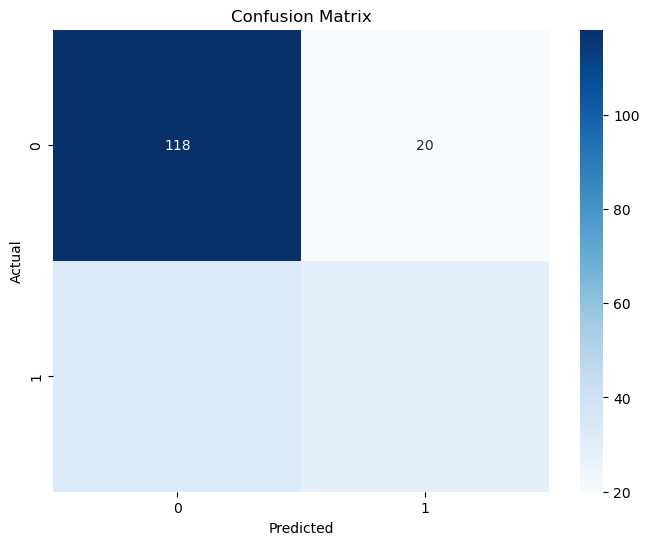

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Confusion Matrix
confusion_mtx = confusion_matrix(y_test, y_pred)

# Visualize Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mtx, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Conclusion

The Traffic Accident Prediction Model represents a significant advancement in the use of data analytics and machine learning for improving road safety. By harnessing historical data and identifying key factors that contribute to traffic accidents, the model offers valuable insights that can lead to more effective safety measures and policies.

## Key Takeaways:

1. **Predictive Capability**: The model's ability to predict accident likelihood enables proactive measures that can prevent accidents before they occur, potentially saving lives and reducing injuries.

2. **Data-Driven Strategies**: By analyzing traffic patterns, weather conditions, and other relevant factors, stakeholders can develop targeted strategies for accident prevention, enhancing overall road safety.

3. **Informing Policy and Planning**: Insights generated from the model can guide policymakers and urban planners in making informed decisions about infrastructure improvements, traffic regulations, and emergency response strategies.

4. **Continuous Improvement**: As more data becomes available and machine learning techniques evolve, the model can be continuously refined and improved, adapting to changing traffic conditions and patterns.

In conclusion, the Traffic Accident Prediction Model not only aims to reduce the frequency and severity of traffic accidents but also fosters a culture of safety and awareness among drivers, authorities, and policymakers. By embracing technology and data-driven approaches, we can make our roads safer for everyone.
